<a href="https://colab.research.google.com/github/fin-ash/MAIR/blob/main/Classification_of_Algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries

from google.colab import drive
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [4]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/creditcard.csv'
data = pd.read_csv(file_path)

# Preprocess the data
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the classifiers
classifiers = {
    'ANN': MLPClassifier(hidden_layer_sizes=(100,)),
    'SVM': svm.SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Print the classification report
    print(f'\\n{name} Classification Report:')
    print(classification_report(y_test, y_pred))


Mounted at /content/drive
\nANN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

\nSVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962

\nDecision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.81      0.76        98

    accuracy                           1.00     56962
   ma

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
\nANN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.82      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

\nSVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962

\nDecision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           

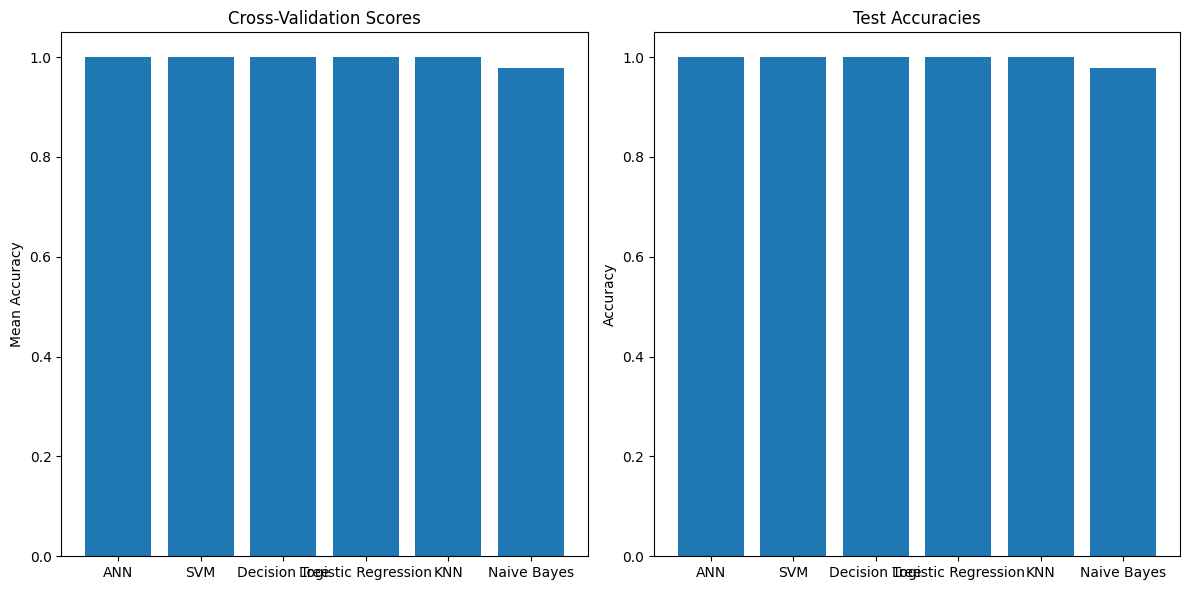

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/creditcard.csv'
data = pd.read_csv(file_path)

# Preprocess the data
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the classifiers
classifiers = {
    'ANN': MLPClassifier(hidden_layer_sizes=(100,)),
    'SVM': svm.SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Initialize lists to store cross-validation scores and test accuracies
cv_scores = []
test_accuracies = []

# Train, evaluate and compare each classifier
for name, clf in classifiers.items():
    # Perform 5-fold cross-validation and store the mean score
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

    # Train the classifier on the full training set
    clf.fit(X_train, y_train)

    # Make predictions on the test set and store the accuracy
    y_pred = clf.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_pred))

    # Print the classification report
    print(f'\\n{name} Classification Report:')
    print(classification_report(y_test, y_pred))

# Plot cross-validation scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(classifiers.keys(), cv_scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Mean Accuracy')

# Plot test accuracies
plt.subplot(1, 2, 2)
plt.bar(classifiers.keys(), test_accuracies)
plt.title('Test Accuracies')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import itertools

# Load the data
file_path = '/content/drive/MyDrive/creditcard.csv'
data = pd.read_csv(file_path)

# Preprocess the data
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the classifiers
classifiers = {
    'ANN': MLPClassifier(hidden_layer_sizes=(100,)),
    'SVM': svm.SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Initialize lists to store cross-validation scores, test accuracies, AUCs and confusion matrices
cv_scores = []
test_accuracies = []
aucs = []
cms = []

# Train, evaluate and compare each classifier
for name, clf in classifiers.items():
    # Perform 5-fold cross-validation and store the mean score
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

    # Train the classifier on the full training set
    clf.fit(X_train, y_train)

    # Make predictions on the test set and store the accuracy
    y_pred = clf.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_pred))

    # Compute the ROC curve and AUC
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    aucs.append(auc(fpr, tpr))

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)

    # Print the classification report
    print(f'\\n{name} Classification Report:')
    print(classification_report(y_test, y_pred))

# Plot cross-validation scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.bar(classifiers.keys(), cv_scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Mean Accuracy')

# Plot test accuracies
plt.subplot(1, 3, 2)
plt.bar(classifiers.keys(), test_accuracies)
plt.title('Test Accuracies')
plt.ylabel('Accuracy')

# Plot AUCs
plt.subplot(1, 3, 3)
plt.bar(classifiers.keys(), aucs)
plt.title('AUCs')
plt.ylabel('AUC')

plt.tight_layout()
plt.show()

# Plot confusion matrices
for i, (name, cm) in enumerate(zip(classifiers.keys(), cms)):
    plt.figure(i)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classifiers.keys()))
    plt.xticks(tick_marks, classifiers.keys(), rotation=45)
    plt.yticks(tick_marks, classifiers.keys())

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


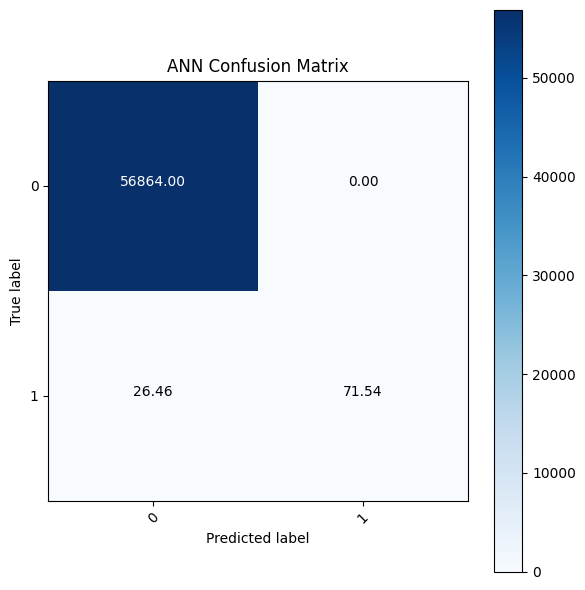

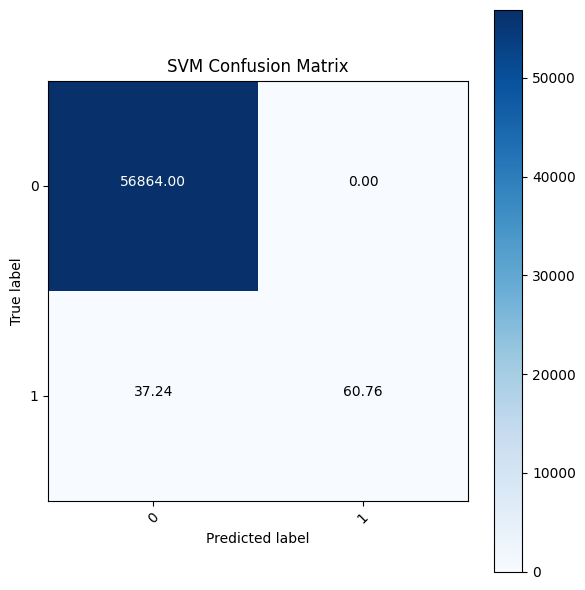

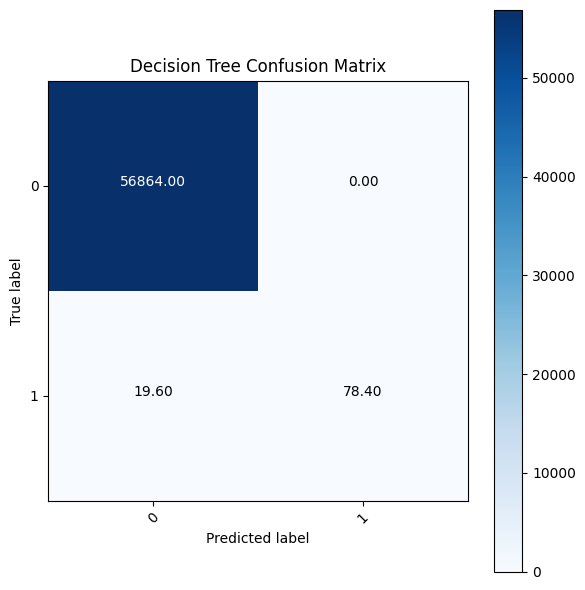

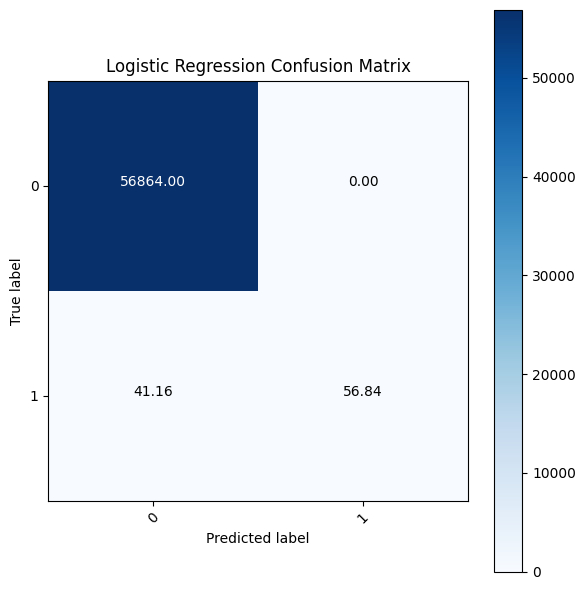

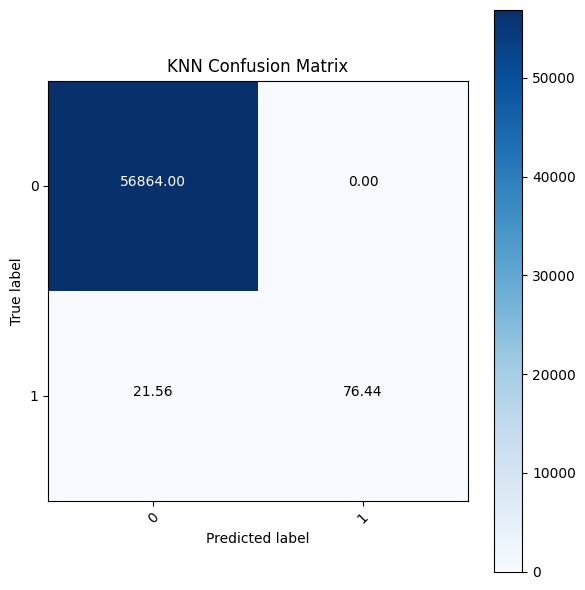

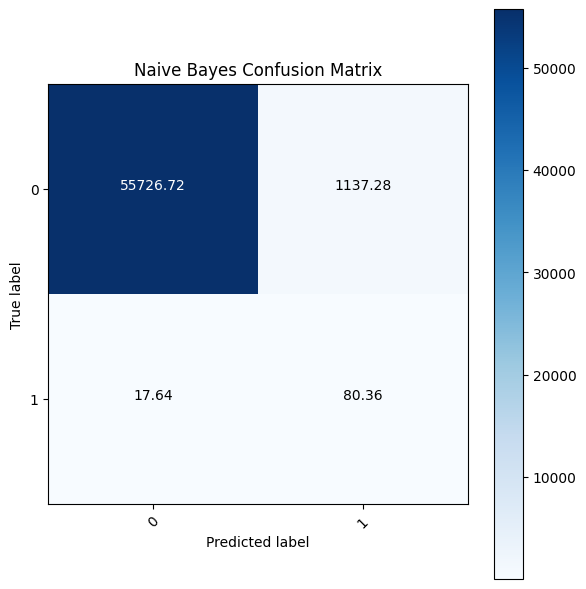

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Define the classification reports
classification_reports = {
    'ANN': {
        '0': {'precision': 1.00, 'recall': 1.00, 'f1-score': 1.00, 'support': 56864},
        '1': {'precision': 0.92, 'recall': 0.73, 'f1-score': 0.82, 'support': 98}
    },
    'SVM': {
        '0': {'precision': 1.00, 'recall': 1.00, 'f1-score': 1.00, 'support': 56864},
        '1': {'precision': 0.97, 'recall': 0.62, 'f1-score': 0.76, 'support': 98}
    },
    'Decision Tree': {
        '0': {'precision': 1.00, 'recall': 1.00, 'f1-score': 1.00, 'support': 56864},
        '1': {'precision': 0.70, 'recall': 0.80, 'f1-score': 0.75, 'support': 98}
    },
    'Logistic Regression': {
        '0': {'precision': 1.00, 'recall': 1.00, 'f1-score': 1.00, 'support': 56864},
        '1': {'precision': 0.86, 'recall': 0.58, 'f1-score': 0.70, 'support': 98}
    },
    'KNN': {
        '0': {'precision': 1.00, 'recall': 1.00, 'f1-score': 1.00, 'support': 56864},
        '1': {'precision': 0.94, 'recall': 0.78, 'f1-score': 0.85, 'support': 98}
    },
    'Naive Bayes': {
        '0': {'precision': 1.00, 'recall': 0.98, 'f1-score': 0.99, 'support': 56864},
        '1': {'precision': 0.06, 'recall': 0.82, 'f1-score': 0.11, 'support': 98}
    }
}

# Define a function to compute confusion matrix from classification report
def compute_confusion_matrix(report):
    TP = report['1']['recall'] * report['1']['support']
    FN = report['1']['support'] - TP
    TN = report['0']['recall'] * report['0']['support']
    FP = report['0']['support'] - TN
    return np.array([[TN, FP], [FN, TP]])

# Compute and plot confusion matrices for each classifier
for name, report in classification_reports.items():
    cm = compute_confusion_matrix(report)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, [0, 1], rotation=45)
    plt.yticks(tick_marks, [0, 1])

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
